Generate nutrient initial files to use in MITgcm runs from data.

Generate tracer initial conditions for MITgcm from Falkor and Line C data
=========================================================================

Profile interpolated from Pathways Curise 2013 at Barkley Canyon data nad Dave Capelle's methane and nitrous acid data from Line C May and September 2012 and 2013. You can also choose between data interp profile and linear interp.
K. Ramos-Musalem

In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt

import struct

%matplotlib inline

In [2]:
def iniTracer(xsize, ysize, IniDepth, IniProfile, InterpDepth):
    
    InterpProfile = np.interp(InterpDepth, IniDepth , IniProfile)
    
    tracer = np.zeros((xsize, ysize, len(InterpDepth)))
    
    for ii in np.arange(xsize):
        
        for jj in np.arange(ysize):
            
            for kk in np.arange(len(InterpDepth)):
        
                tracer[ii,jj,kk]=InterpProfile[kk] 
            

    return tracer

In [3]:
def iniTracerLin(xsize, ysize, TopVal,BotVal, Depth ):
    
    # Generate linear nutrient profile (i.e. C(Depth)= IniVal*Depth) 
    
    M = (BotVal-TopVal)/(Depth[len(Depth)-1]-Depth[0])
    b = (TopVal - M*Depth[0])*np.ones((len(Depth),1))
    
    tracer = np.zeros((xsize, ysize, len(Depth)))
    
    for ii in np.arange(xsize):
        for jj in np.arange(ysize):
            for kk in np.arange(len(Depth)):
                tracer[ii,jj,kk]=M*Depth[kk]+b[kk] 
            

    return tracer

In [4]:
def iniTracerLinHor(xsize, zsize, TopVal,BotVal, yvec ):
    
    # Generate linear nutrient profile (i.e. C(yvec)= IniVal*yvec) 
    
    M = (BotVal-TopVal)/(yvec[len(yvec)-1]-yvec[0])
    b = (TopVal - M*yvec[0])*np.ones((len(yvec),1))
    
    tracer = np.zeros((xsize,len(yvec),zsize))
    
    for ii in np.arange(xsize):
        for jj in np.arange(zsize):
            for kk in np.arange(len(yvec)):
                tracer[ii,kk,jj]=M*yvec[kk]+b[kk] 
            

    return tracer

In [5]:
def iniTracerCnt(xsize, ysize, CntVal, Depth ):
    # Generate constant nutrient profile  
    
    tracer = np.ones((xsize, ysize, len(Depth)))
    tracer = tracer*CntVal
    

    return tracer

In [6]:
# Profile values form interp nutrient data from Falkor (see NutrientProfilesFalkor.ipynb)

dt = np.dtype('>f8')  # float 64 big endian


nx = 360
ny = 360
nz = 90

# Depth values

depth = [5.,20.,30.,50.,70.,100.,150.,170.,200.,300.,400.,500.,600.,700.,800.,1000.,1200.] #values form interp nutrient data 
                                                                                            # from Falkor (see NutrientProfilesFalkor.ipynb)
depthLineC = [0.,50.,100.,150.,200.,250.,300.,350.,400.,450.,500.,550.,600.,650.,700.,750.]

## 90 layers
#zi = (5,10,	15,	20,	25,	30,	35,	40,	45,	50,	55,	60,	65,	70,	75,	80,	85,	90,	95,	100,105,110,
#      115,120,125,130,135,140,145,150,155,160,165,170,180,190,200,210,220,230,240,250,260,280,
#      300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,
#      740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080,1100,1120)

zi = (5,9,14,19,23,28,33,37,42,47,52,56,61,66,70,75,80,85,89,94,99,103,108,113,118,122,127,132,
      137,142,146,151,156,161,166,170,175,180,185,190,195,200,204,209,214,219,224,230,235,240,
      245,251,256,262,268,274,282,293,311,333,356,379,403,427,451,475,500,524,549,573,598,623,
      647,672,697,721,746,771,795,820,845,870,895,919,966,1013,1060,1106,1153,1200) # New depths

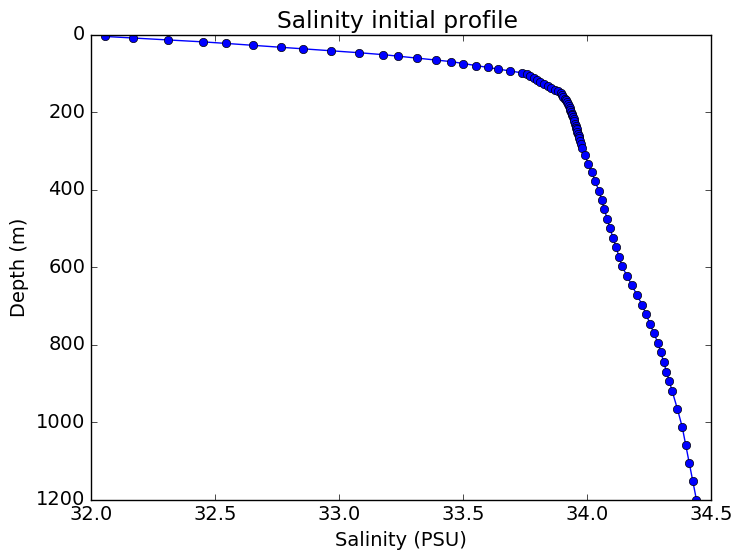

In [7]:
#Salinity

sal = [32.05565615,  32.47904982,  32.69883153,  33.14754095,
        33.45287546,  33.74755425,  33.89389881,  33.9139597 ,
        33.93728968,  33.98439263,  34.04611345,  34.09233602,
        34.14232788,  34.22413622,  34.28826251,  34.37998532,  34.4410795 ] #Falkor Salinity

Sal = iniTracer(nx,ny,depth,sal,zi)
#Sal = iniTracerLin(nx,ny,32.0,34.0,zi)

# Save binary file
tmpfile = "%dx%dx%d_SmoothVertRes/Barkley_sal_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Sal2 = Sal.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
Sal2.astype(dt).tofile(fileobj,"")
fileobj.close()

### PLOT Contour

plt.rcParams.update({'font.size':14})
plt.rcParams['contour.negative_linestyle']='solid'

plt.figure(figsize=(8,6))

CS = plt.plot(np.squeeze(Sal[60,45,:]),zi,'bo-')

plt.gca().invert_yaxis()
    
plt.xlabel('Salinity (PSU)')
    
plt.ylabel('Depth (m)')
    

plt.title('Salinity initial profile ')



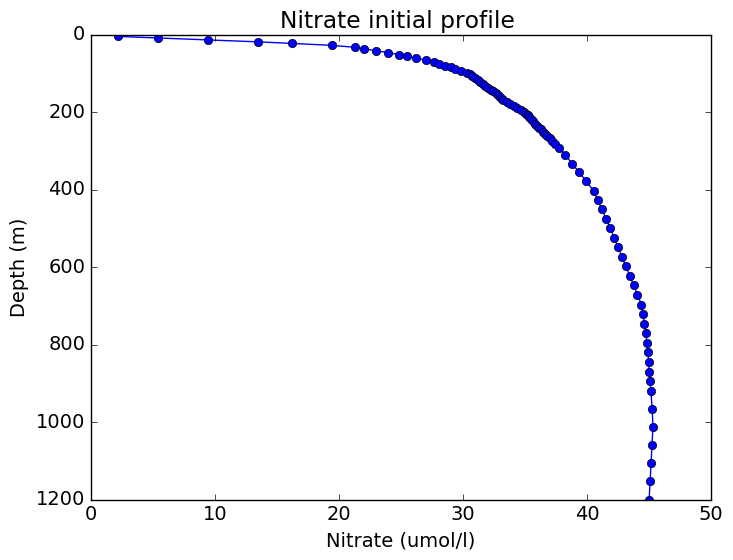

In [8]:
#Nitrate (from annual average)

nit = [  2.20769231,  14.30606356,  20.69884474,  24.54682499,
        27.64221491,  30.40401935,  32.60791595,  33.23055095,
        34.93009381,  37.96639598,  40.48248953,  41.87936656,
        43.16092676,  44.42630919,  44.86319564,  45.33917039,  45.01343725] #Falkor Nitrate

Nitrate = iniTracer(nx,ny,depth,nit,zi)
#Nitrate = iniTracerLin(nx,ny,2.0,45.0,zi)

               
# Save binary file
tmpfile = "%dx%dx%d_SmoothVertRes/Barkley_nit_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Nitrate2 = Nitrate.transpose((2,0,1)) # To keep fortran order when writing as C binary
Nitrate2.astype(dt).tofile(fileobj,"")
fileobj.close()


### PLOT Contour

plt.rcParams.update({'font.size':14})
plt.rcParams['contour.negative_linestyle']='solid'

plt.figure(figsize=(8,6))

CS = plt.plot(np.squeeze(Nitrate[60,45,:]),zi,'bo-')

plt.gca().invert_yaxis()
    
plt.xlabel('Nitrate (umol/l)')
    
plt.ylabel('Depth (m)')
    

plt.title('Nitrate initial profile ')


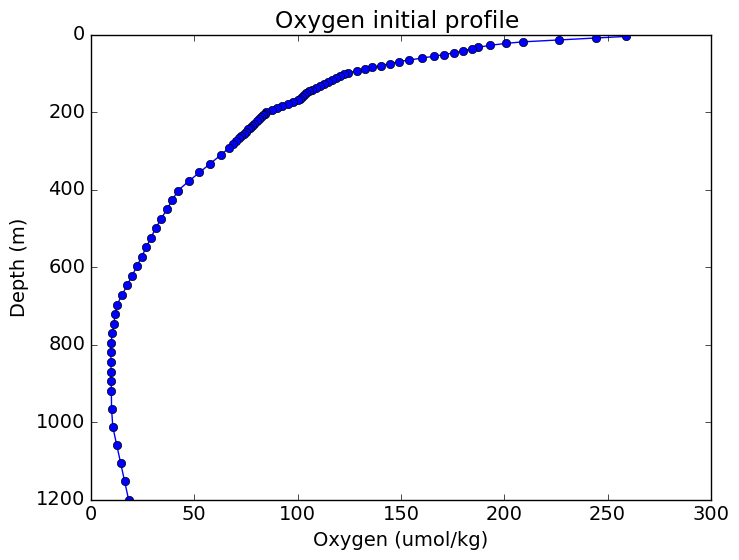

In [9]:
oxy = [ 258.64692308,  205.30523866,  189.93474682,  173.32762752,
        148.99494704,  123.39376698,  104.07073273,  100.34682448,
         84.75278265,   65.32870403,   42.38594405,   31.24731648,
         22.04183918,   12.32014822,    9.56728914,   10.02871031,
         18.18188635] #Falkor Oxygen

Oxygen = iniTracer(nx,ny,depth,oxy,zi)

# Save binary file
tmpfile = "%dx%dx%d_SmoothVertRes/Barkley_oxy_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Oxygen2 = Oxygen.transpose((2,0,1)) # To keep fortran order when writing as C binary
Oxygen2.astype(dt).tofile(fileobj,"")
fileobj.close()        


### PLOT Contour

plt.rcParams.update({'font.size':14})
plt.rcParams['contour.negative_linestyle']='solid'

plt.figure(figsize=(8,6))

CS = plt.plot(np.squeeze(Oxygen[60,45,:]),zi,'bo-')

plt.gca().invert_yaxis()
    
plt.xlabel('Oxygen (umol/kg)')
    
plt.ylabel('Depth (m)')
    

plt.title('Oxygen initial profile ')




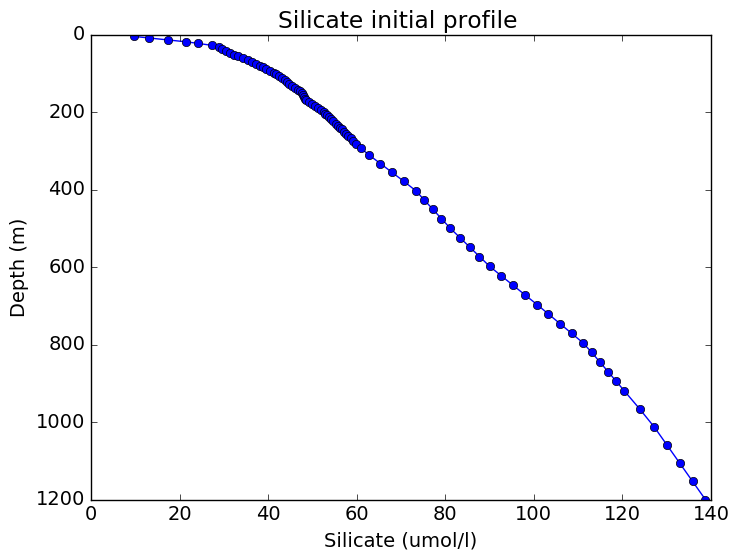

In [10]:
sil = [ 9.77487179,   22.40324386,   28.481157  ,   31.81179168,
         36.35084393,   41.51053289,   47.62601443,   48.57082304,
         52.54408413,   61.52273871,   73.08433615,   81.12181574,
         90.16770523,  101.05308596,  111.55221474,  126.39029233,
        138.72363852 ] #Falkor Silicate

Silicate = iniTracer(nx,ny,depth,sil,zi)

# Save binary file
tmpfile = "%dx%dx%d_SmoothVertRes/Barkley_sil_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Silicate2 = Silicate.transpose((2,0,1)) # To keep fortran order when writing as C binary
Silicate2.astype(dt).tofile(fileobj,"")
fileobj.close()              



### PLOT Contour

plt.rcParams.update({'font.size':14})
plt.rcParams['contour.negative_linestyle']='solid'

plt.figure(figsize=(8,6))

CS = plt.plot(np.squeeze(Silicate[60,45,:]),zi,'bo-')

plt.gca().invert_yaxis()
    
plt.xlabel('Silicate (umol/l)')
    
plt.ylabel('Depth (m)')
    

plt.title('Silicate initial profile ')



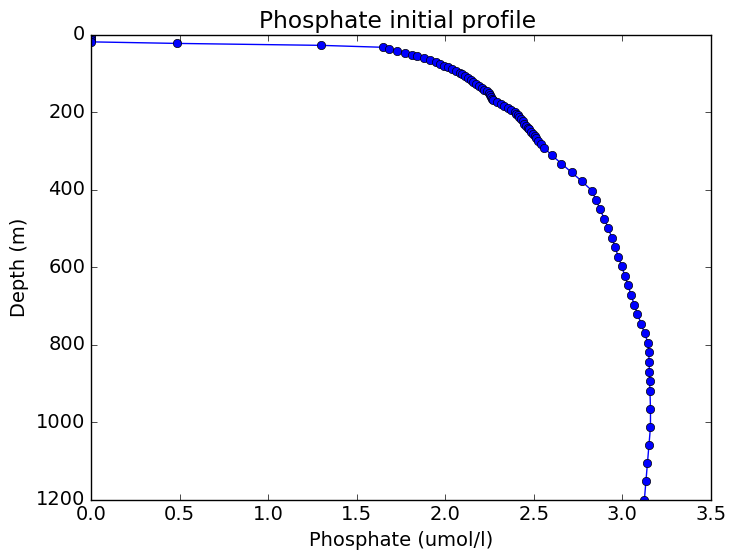

In [11]:
pho = [0, 0,  1.6205616 ,  1.79738767,  1.94555393,
        2.08709737,  2.24576282,  2.27144092,  2.39342327,  2.57196961,
        2.82463189,  2.92081108,  2.99713342,  3.06841061,  3.14757836,
        3.16063801,  3.12403118  ] #Falkor Phosphate

Phosphate = iniTracer(nx,ny,depth,pho,zi)

               
# Save binary file
tmpfile = "%dx%dx%d_SmoothVertRes/Barkley_pho_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Phosphate2 = Phosphate.transpose((2,0,1)) # To keep fortran order when writing as C binary
Phosphate2.astype(dt).tofile(fileobj,"")
fileobj.close()              



### PLOT Contour

plt.rcParams.update({'font.size':14})
plt.rcParams['contour.negative_linestyle']='solid'

plt.figure(figsize=(8,6))

CS = plt.plot(np.squeeze(Phosphate[60,45,:]),zi,'bo-')

plt.gca().invert_yaxis()
    
plt.xlabel('Phosphate (umol/l)')
    
plt.ylabel('Depth (m)')
    

plt.title('Phosphate initial profile ')



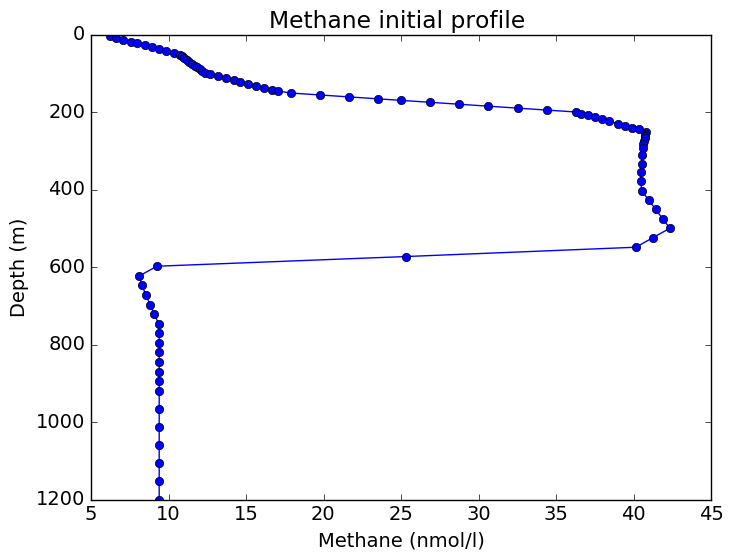

In [12]:
met = [ 5.7       ,  10.64469773,  12.39183632,  17.50460996,
        36.27632856,  40.79841802,  40.55482783,  40.51003523,
        40.46664286,  41.40465804,  42.34615163,  40.09929176,
         7.96460677,   8.29779559,   8.8488978 ,   9.4  ] # LineC Methane

Methane = iniTracer(nx,ny,depthLineC,met,zi)

               
# Save binary file
tmpfile = "%dx%dx%d_SmoothVertRes/LineCSep2013_met_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Methane2 = Methane.transpose((2,0,1)) # To keep fortran order when writing as C binary
Methane2.astype(dt).tofile(fileobj,"")
fileobj.close()              



### PLOT Contour

plt.rcParams.update({'font.size':14})
plt.rcParams['contour.negative_linestyle']='solid'

plt.figure(figsize=(8,6))

CS = plt.plot(np.squeeze(Methane[60,45,:]),zi,'bo-')

plt.gca().invert_yaxis()
    
plt.xlabel('Methane (nmol/l)')
    
plt.ylabel('Depth (m)')
    

plt.title('Methane initial profile ')



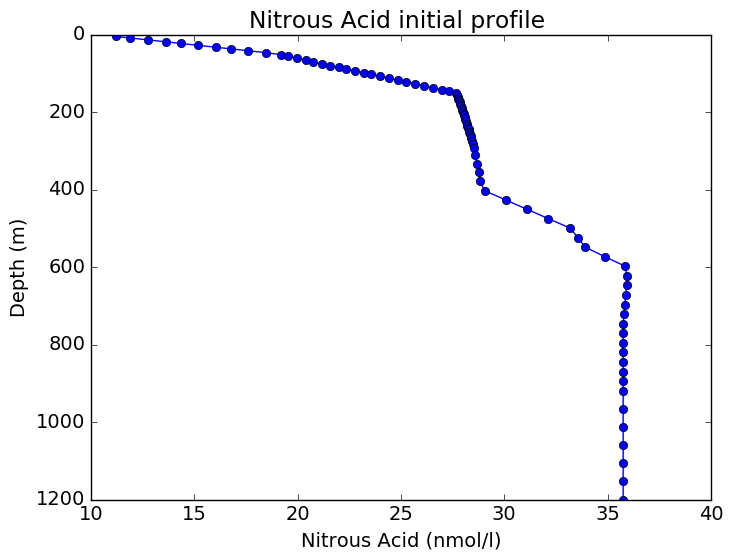

In [13]:
nac = [  10.35      ,  19.00521367,  23.30548951,  27.66736277,
        28.00249004,  28.3022331 ,  28.55923913,  28.73341284,
        28.91225443,  31.05146831,  33.1970117 ,  33.93446295,
        35.92803017,  35.91032064,  35.83016032,  35.75  ] # LineC Methane

NitAcid = iniTracer(nx,ny,depthLineC,nac,zi)

               
# Save binary file
tmpfile = "%dx%dx%d_SmoothVertRes/LineCSep2013_nac_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
NitAcid2 = NitAcid.transpose((2,0,1)) # To keep fortran order when writing as C binary
NitAcid2.astype(dt).tofile(fileobj,"")
fileobj.close()              



### PLOT Contour

plt.rcParams.update({'font.size':14})
plt.rcParams['contour.negative_linestyle']='solid'

plt.figure(figsize=(8,6))

CS = plt.plot(np.squeeze(NitAcid[60,45,:]),zi,'bo-')

plt.gca().invert_yaxis()
    
plt.xlabel('Nitrous Acid (nmol/l)')
    
plt.ylabel('Depth (m)')
    

plt.title('Nitrous Acid initial profile ')



Let's check what we wrote...

In [14]:

fileNAME = "%dx%dx%d_SmoothVertRes/Barkley_oxy_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
tempp=np.fromfile(fileNAME, dt)

In [15]:

temppp=np.reshape(tempp,(nx,ny,len(zi)),order='F')
np.shape(temppp)

(360, 360, 90)

In [16]:
print(max(tempp))


258.64692308


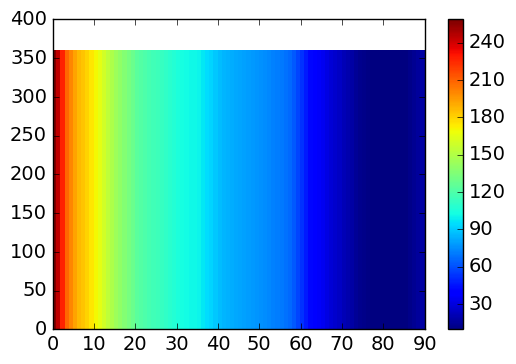

In [17]:
plt.pcolor(temppp[80,:,:])
plt.colorbar()

Generate horizontal tracer gradient file